In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/emorisse/FBI-Hate-Crime-Statistics/master/2013/table13.csv"
df = pd.read_csv(url, sep=',')
df.head()

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0.0,0.0,1.0,0.0,1.0,"39,481"
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,"84,139"
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0.0,1.0,0.0,1.0,0.0,"35,154"
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,"94,126"
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0.0,2.0,3.0,3.0,0.0,"299,455"


In [3]:
df.fillna(1.0, inplace = True)
df.head()

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0.0,0.0,1.0,0.0,1.0,"39,481"
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,"84,139"
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0.0,1.0,0.0,1.0,0.0,"35,154"
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,"94,126"
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0.0,2.0,3.0,3.0,0.0,"299,455"


In [4]:
df['Annual'] = df["1st quarter"] + df["2nd quarter"] + df["3rd quarter"] + df["4th quarter"]
for ind, row in df.iterrows():
    a = row['Population']
    if type(a) == str:
        b = a.replace(',', '')
        df.loc[ind, "Population"] = float(b)

In [21]:
df.sort_values(by = ['Annual'], ascending = False)

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population,Annual,Rate
1145,New_York,Cities,New York,44,152,99,17,1,0,1.0,56.0,84.0,81.0,93.0,8.39613e+06,314.0,0.0373982
665,Massachusetts,Cities,Boston,73,21,53,15,0,0,3.0,39.0,56.0,40.0,30.0,643799,165.0,0.256291
1292,Ohio,Cities,Columbus,88,4,17,15,12,0,0.0,8.0,22.0,60.0,46.0,816364,136.0,0.166592
135,California,Cities,Los Angeles,41,29,33,9,0,0,2.0,21.0,40.0,25.0,28.0,3.87872e+06,114.0,0.0293911
1745,Washington,Cities,Seattle,50,14,14,6,3,2,0.0,19.0,23.0,29.0,18.0,642814,89.0,0.138454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,Michigan,Cities,Lake Orion,1,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3052,1.0,0.327654
789,Michigan,Cities,Jonesville,1,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2231,1.0,0.448229
788,Michigan,Cities,Jackson,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,33378,1.0,0.0299599
784,Michigan,Cities,Highland Park,0,1,0,0,0,0,0.0,0.0,0.0,0.0,1.0,11591,1.0,0.0862738


In [19]:
df['Rate'] = (df['Annual']/df['Population']) * 1000
a = df[df['Rate']<1]
a.sort_values(by = ['Rate'], ascending = False)

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population,Annual,Rate
1521,Tennessee,Cities,Jonesborough,0,0,0,4,1,0,0.0,0.0,0.0,2.0,3.0,5163,5.0,0.968429
1139,New_York,Cities,Liberty Village,0,4,0,0,0,0,0.0,0.0,0.0,0.0,4.0,4285,4.0,0.933489
771,Michigan,Cities,Fruitport,1,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1090,1.0,0.917431
1401,Oklahoma,Cities,Talihina,0,0,1,0,0,0,0.0,0.0,0.0,1.0,0.0,1112,1.0,0.899281
1354,Ohio,Universities and Colleges,Capital University,2,0,1,0,0,0,0.0,0.0,0.0,0.0,3.0,3584,3.0,0.837054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,Florida,Cities,St. Petersburg,0,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,247084,1.0,0.00404721
483,Indiana,Cities,Fort Wayne,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,254820,1.0,0.00392434
638,Maryland,Cities,Baltimore,0,1,0,1,0,0,0.0,1.0,0.0,0.0,1.0,622671,2.0,0.00321197
1566,Texas,Cities,Corpus Christi,0,0,1,0,0,0,0.0,0.0,0.0,0.0,1.0,314523,1.0,0.00317942


In [7]:
#replacing string values in population
state_pops = {}
for ind, row in df.iterrows():
    if row['State'] in state_pops.keys():
        state_pops[row['State']] += row['Population']
    else:
        state_pops[row['State']] = row['Population']

In [22]:
#state aggregate
state_sum = df.groupby(['State']).sum()
state_sum['Population'] = state_pops.values()
state_sum['Rate'] = (state_sum['Annual']/state_sum['Population']) * 1000
state_sum.sort_values(by = ['Rate'], ascending = False).head()

,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Annual,Population,Rate
State,,,,,,,,,,,,,
West_Virginia,40,6,8,2,0,0.0,5.0,16.0,24.0,11.0,56.0,222605.0,0.251567
North_Dakota,27,5,4,10,5,0.0,8.0,7.0,19.0,17.0,51.0,328173.0,0.155406
Delaware,9,0,3,0,0,0.0,3.0,5.0,4.0,0.0,12.0,77818.0,0.154206
Maine,12,3,10,0,0,0.0,6.0,9.0,7.0,4.0,26.0,221933.0,0.117152
DC,18,6,32,4,0,12.0,19.0,21.0,22.0,10.0,72.0,646450.0,0.111378


<AxesSubplot:xlabel='Religion'>

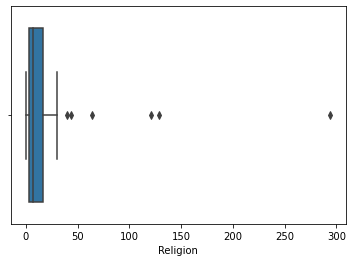

In [9]:
sns.boxplot(x = state_sum["Religion"])

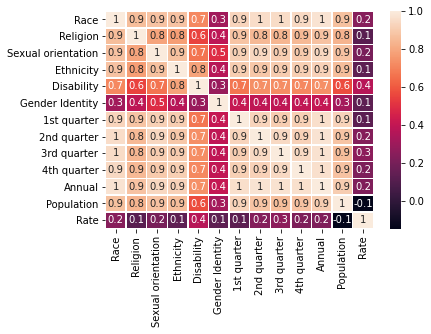

In [10]:
state_matrix = sns.heatmap(state_sum.corr("spearman"), annot = True, fmt = '.1g', linewidths=.5,)